<a href="https://colab.research.google.com/github/good-thinking/easy-coding2/blob/main/%EA%B5%AC%EA%B0%95%EC%A1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 소년범죄자 수의 감소와 지능형 범죄자 수 증가

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
from pandas.errors import InvalidIndexError

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [3]:
def read_file(file_address) :
  print("-------------- file read ---------------")
  df = pd.read_csv(file_address, encoding = "cp949")
  df = pd.DataFrame(df)
  return df

In [4]:
def normalization(df, column_number):
  print("-------------- normalization ---------------")
  df[df.columns[column_number]] = np.log1p(df[df.columns[column_number]])
  sns.distplot(df[df.columns[column_number]])
  return df

In [5]:
def data_IQR(df,column_number) :
  print("-------------- Data_IQR ---------------")
  q1 = df[df.columns[column_number]].quantile(q=0.25)
  q3 = df[df.columns[column_number]].quantile(q=0.75)
  IQR = q3-q1
  data_IQR2 = df[(df[df.columns[column_number]] < q3 + IQR * 1.5) & 
                 (df[df.columns[column_number]] > q1 - IQR * 1.5)]
  sns.distplot(df[df.columns[column_number]])
  return data_IQR2

In [28]:
from typing_extensions import dataclass_transform
def before_making_model(df, x_list, column_number):
  num = x_list
  X = df[num]
  Y = df[df.columns[column_number]]
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
  ct = ColumnTransformer([('scling', StandardScaler(), num)])
  ct.fit(X_train)
  X_train = ct.transform(X_train)
  X_test = ct.transform(X_test)
  return [X_train, X_test, Y_train, Y_test]

In [7]:
def print_columns(df):
  column = pd.DataFrame(df.columns)
  print(column)


In [45]:
def linearRegress(train_test_data,columns):
  print("----------LinearRegression value-----------")
  X_train, X_test, Y_train, Y_test = train_test_data
  #X_train = train_test_data[0]
  #X_test = train_test_data[1]
  #Y_train = train_test_data[2]
  #Y_test = train_test_data[3]

  lr = LinearRegression().fit(X_train, Y_train) 
  Y_pred = lr.predict(X_test)
  print("predict value\n",Y_pred)
  print("train R2 : {:.3f}".format(lr.score(X_train, Y_train)))
  print("test R2 : {:.3f}".format(lr.score(X_test, Y_test))) 
  rmse = sqrt(mean_squared_error(Y_test, Y_pred)) 
  print("RMSE : {:.3f}". format(rmse)) 
  print("--------------------------")
  print(columns)
  print("절편", np.round(lr.intercept_, 3))
  print("가중치(beta)", np.round(lr.coef_, 3))
  return [Y_pred, Y_test]

In [56]:
def Ridge_function(train_test_data):
  X_train, X_test, Y_train, Y_test = train_test_data
  lr_ridge = Ridge(random_state = 0).fit(X_train, Y_train)
  Y_pred = lr_ridge.predict(X_test)
  rmse = sqrt(mean_squared_error(Y_test, Y_pred))
  print("ridge R2 : {:.3f}".format(lr_ridge.score(X_train, Y_train)))
  print("RMSE : {:.3f}".format(rmse))
  return [Y_pred, Y_test]


In [64]:
def Lasso_function(train_test_data):
  X_train, X_test, Y_train, Y_test = train_test_data
  lr_lasso = Lasso(random_state = 0, alpha = 0.01, max_iter = 1000).fit(X_train, Y_train)
  Y_pred = lr_lasso.predict(X_test)

  rmse = sqrt(mean_squared_error(Y_test, Y_pred))
  print("lasso R2 : {:.3f}".format(lr_lasso.score(X_train, Y_train)))
  print("RMSE : {:.3f}".format(rmse))
  return [Y_pred, Y_test]

In [67]:
def Elastic_function(train_test_data):
  X_train, X_test, Y_train, Y_test = train_test_data
  lr_ela = ElasticNet(alpha = 0.01).fit(X_train, Y_train)
  Y_pred = lr_ela.predict(X_test)

  rmse = sqrt(mean_squared_error(Y_test, Y_pred))
  print("ela R2 : {:.3f}".format(lr_ela.score(X_train, Y_train)))
  print("RMSE : {:.3f}".format(rmse))
  return [Y_pred, Y_test]

In [9]:
def Reset_index(Y_test,column_number):
  Y_test_df = (pd.DataFrame(Y_test)).reset_index()
  Y_test_df = pd.DataFrame(Y_test_df[df.columns[column_number]])
  return Y_test_df


In [10]:
def plot_picture(Y_pred,Y_test):
  print("----------- plot grow----------- ")
  %matplotlib Inline
  plt.plot(Y_pred)
  plt.plot(Y_test)

-------------- file read ---------------
-------------- normalization ---------------
-------------- Data_IQR ---------------
----------LinearRegression value-----------
predict value
 [2.69968882 2.69537222 2.67685396 2.66356519 2.63720303 2.66734652
 2.67529824 2.69005778 2.65074097 2.67381009 2.69141663 2.66091628
 2.657501   2.66406011 2.65368856 2.6716621  2.67486292 2.67636183
 2.65236673 2.65871539 2.6501332  2.65600339 2.6578112  2.67200504
 2.66054371 2.67178194 2.65041888 2.66481727 2.66314964 2.64932462
 2.64756309 2.66272271 2.64872489 2.64670487 2.64952096 2.67542807
 2.67416913 2.67988598 2.63268783 2.66349211 2.67619804 2.65743676
 2.64768825 2.65214561]
train R2 : 0.013
test R2 : 0.039
RMSE : 0.122
--------------------------
Index(['시점', '행정구역별', '경찰공무원 1인당 담당주민수<br>(A÷B)', '전체인구(A) (명)', '1인당 지역총소득',
       '소년 천명당 소년범죄발생건수<br>(A÷B×1000) (건)', '인구 천명당 사설학원수<br>(A÷B×1000) (개)'],
      dtype='object')
절편 2.661
가중치(beta) [ 0.013  0.001 -0.003 -0.004]
----------- plot grow

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


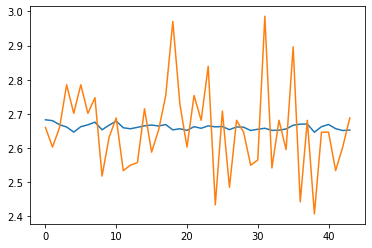

In [68]:
df = read_file("/content/drive/MyDrive/파이썬/총합데이터.csv")
df = normalization(df, 5)
df = data_IQR(df,5)
train_test_data = before_making_model(df,[df.columns[2],df.columns[3],df.columns[4], df.columns[6]],5)

Y_value = linearRegress(train_test_data, df.columns)
Y_test = Reset_index(Y_value[1],5)
plot_picture(Y_value[0],Y_test)

Y_value2 = Ridge_function(train_test_data)
Y_test = Reset_index(Y_value2[1],5)
plot_picture(Y_value2[0],Y_test)

Y_value3 = Lasso_function(train_test_data)
Y_test = Reset_index(Y_value3[1],5)
plot_picture(Y_value3[0],Y_test)

Y_value4 = Elastic_function(train_test_data)
Y_test = Reset_index(Y_value4[1],5)
plot_picture(Y_value4[0],Y_test)

In [48]:
df

,시점,행정구역별,경찰공무원 1인당 담당주민수<br>(A÷B),전체인구(A) (명),1인당 지역총소득,소년 천명당 소년범죄발생건수<br>(A÷B×1000) (건),인구 천명당 사설학원수<br>(A÷B×1000) (개)
0,2013,전국,491.9,51141463,30038,2.747271,1.5
1,2013,서울특별시,396.7,10143645,39570,2.815409,1.3
3,2013,대구광역시,495.6,2501588,21992,2.895912,1.5
4,2013,인천광역시,550.1,2879782,25483,2.890372,1.1
5,2013,광주광역시,494.6,1472910,22992,2.873565,2.3
...,...,...,...,...,...,...,...
151,2021,전라북도,347.8,1786855,31157,2.595255,2.2
152,2021,전라남도,320.1,1832803,38857,2.701361,1.5
153,2021,경상북도,382.6,2626609,38000,2.484907,1.4
154,2021,경상남도,454.6,3314183,32968,2.433613,1.8
